In [1]:
#Problem Statement: To predict three month sales values per item of a store data.

import pandas as pd
import numpy as np

In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/Store_Item_demand_forecast.csv",parse_dates=['date'])

In [3]:
data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
data.tail()

,date,store,item,sales
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


In [5]:
data.info

<bound method DataFrame.info of              date  store  item  sales
0      2013-01-01      1     1     13
1      2013-01-02      1     1     11
2      2013-01-03      1     1     14
3      2013-01-04      1     1     13
4      2013-01-05      1     1     10
...           ...    ...   ...    ...
912995 2017-12-27     10    50     63
912996 2017-12-28     10    50     59
912997 2017-12-29     10    50     74
912998 2017-12-30     10    50     62
912999 2017-12-31     10    50     82

[913000 rows x 4 columns]>

In [6]:
data.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


For item the data  is normally distributed while for sales the data is near to normal distribution. 

In [7]:
data.isnull()

,date,store,item,sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
912995,False,False,False,False
912996,False,False,False,False
912997,False,False,False,False
912998,False,False,False,False


In [8]:
data.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

There are no null values.

In [9]:
data.store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [10]:
data.item.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [11]:
ds1 = data[data['store']==1]        # data of store 1
ds1

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
896561,2017-12-27,1,50,38
896562,2017-12-28,1,50,52
896563,2017-12-29,1,50,59
896564,2017-12-30,1,50,66


In [12]:
ds1 = ds1.drop(columns='store',axis=1)
ds1

,date,item,sales
0,2013-01-01,1,13
1,2013-01-02,1,11
2,2013-01-03,1,14
3,2013-01-04,1,13
4,2013-01-05,1,10
...,...,...,...
896561,2017-12-27,50,38
896562,2017-12-28,50,52
896563,2017-12-29,50,59
896564,2017-12-30,50,66


In [13]:
ds11 = ds1[ds1['item']==1]      # data of store 1 and item 1
ds11

,date,item,sales
0,2013-01-01,1,13
1,2013-01-02,1,11
2,2013-01-03,1,14
3,2013-01-04,1,13
4,2013-01-05,1,10
...,...,...,...
1821,2017-12-27,1,14
1822,2017-12-28,1,19
1823,2017-12-29,1,15
1824,2017-12-30,1,27


In [14]:
ds11.describe()

,item,sales
count,1826.0,1826.000000
mean,1.0,19.971522
std,0.0,6.741022
min,1.0,4.000000
25%,1.0,15.000000
50%,1.0,19.000000
75%,1.0,24.000000
max,1.0,50.000000


The data is fairly normally distributed.

In [15]:
ds11 = ds11.drop(columns='item',axis=1)
ds11

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10
...,...,...
1821,2017-12-27,14
1822,2017-12-28,19
1823,2017-12-29,15
1824,2017-12-30,27


In [16]:
ds11  =  ds11.set_index(['date'])
ds11

,sales
date,
2013-01-01,13
2013-01-02,11
2013-01-03,14
2013-01-04,13
2013-01-05,10
...,...
2017-12-27,14
2017-12-28,19
2017-12-29,15


In [17]:
ds11_resampled = ds11.resample("M").mean()

In [18]:
ds11_resampled.info

<bound method DataFrame.info of                 sales
date                 
2013-01-31  10.580645
2013-02-28  11.500000
2013-03-31  15.387097
2013-04-30  17.400000
2013-05-31  17.129032
2013-06-30  20.900000
2013-07-31  21.322581
2013-08-31  19.161290
2013-09-30  17.300000
2013-10-31  15.612903
2013-11-30  19.066667
2013-12-31  12.516129
2014-01-31  14.032258
2014-02-28  14.464286
2014-03-31  17.709677
2014-04-30  19.100000
2014-05-31  21.000000
2014-06-30  23.666667
2014-07-31  24.064516
2014-08-31  21.645161
2014-09-30  18.866667
2014-10-31  17.903226
2014-11-30  20.633333
2014-12-31  13.193548
2015-01-31  13.806452
2015-02-28  14.250000
2015-03-31  17.806452
2015-04-30  21.733333
2015-05-31  22.935484
2015-06-30  24.933333
2015-07-31  27.161290
2015-08-31  22.774194
2015-09-30  22.600000
2015-10-31  20.870968
2015-11-30  22.800000
2015-12-31  14.838710
2016-01-31  14.483871
2016-02-29  15.517241
2016-03-31  19.000000
2016-04-30  23.133333
2016-05-31  25.225806
2016-06-30  26.333333


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


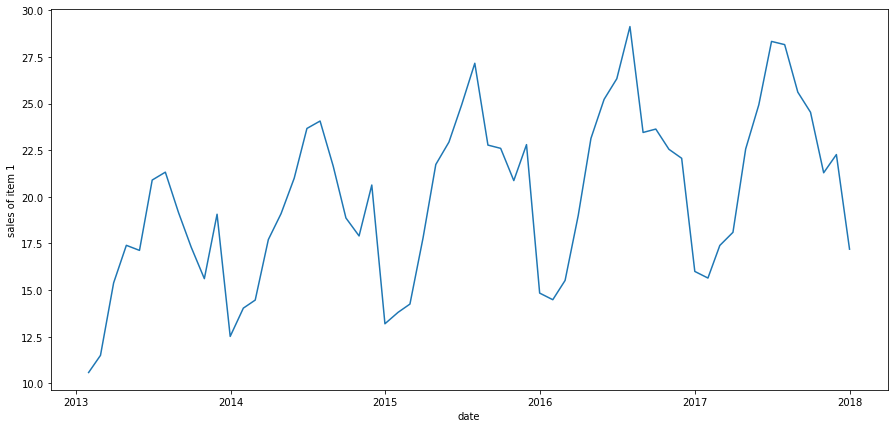

In [19]:
import matplotlib.pylab as plt 
%matplotlib inline                        

plt.figure(figsize=(15,7))
plt.xlabel('date')
plt.ylabel('sales of item 1')
plt.plot(ds11_resampled)

The time series has seasonality pattern such that sales go on increasing till mid of year and then decrease giving a peak near end of year. This time series looks stationary to confirm stationarity we need to perform ADF test. But before that let's decompose it into the components. 

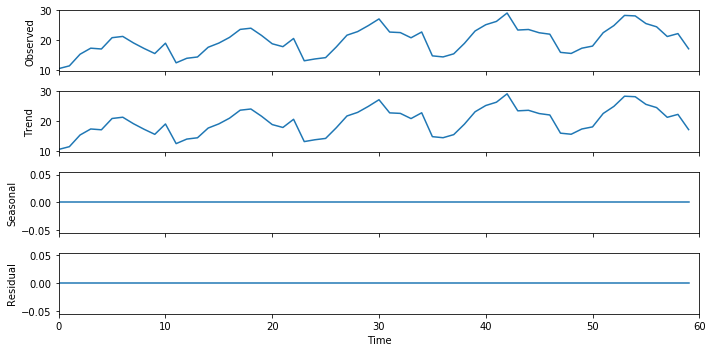

In [20]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']  =  10, 5

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ds11_resampled.sales.values,  model='additive', freq=1)
figure  =  result.plot()
plt.show()

In [21]:
def rolling_means(time_series):
    rolmean  =  ds11_resampled.rolling(window = 12).mean()    #window size 12 denotes 12 months, giving rolling mean at yearly level
    rolstd  =  ds11_resampled.rolling(window = 12).std()

#Plot rolling statistics

    rcParams['figure.figsize']  =  10, 5 

    orig  =  plt.plot(ds11_resampled, color = 'blue', label = 'Original')
    mean  =  plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std  =  plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)

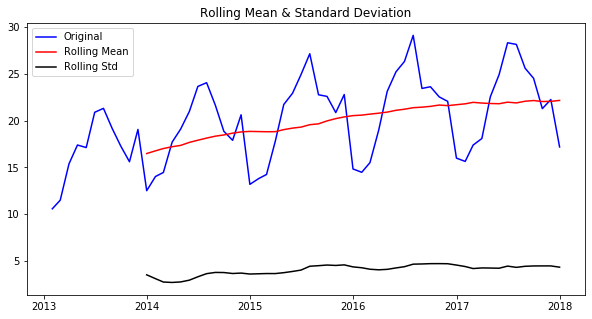

In [22]:
rolling_means(ds11_resampled)

Rolling mean is not parallel to X axis. It should not vary with time. 
Rolling std deviation is fairly constant with time.

In [23]:
# To check whether time series is stationary or not
def adf_test(time_series):
    from statsmodels.tsa.stattools import adfuller
    dftest  =  adfuller(time_series['sales'], autolag = 'AIC')

    dfoutput  =  pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]  =  value
    
    print('Results of Dickey Fuller Test:')    
    print(dfoutput)

In [24]:
adf_test(ds11_resampled)

Results of Dickey Fuller Test:
Test Statistic                 -4.051322
p-value                         0.001164
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


As test statistics value (-4.051) < critical value (-3.575), with 99% confidence we can say that the time series is stationary. p value < 0.05 indicates that the time series is stationary.

Data transformation to improve stationarity.

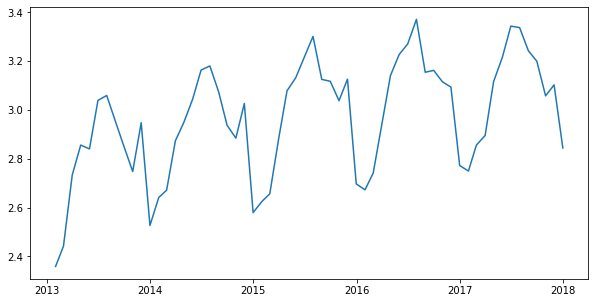

In [25]:
# Logscale Transformation
import numpy as np
ds11resampled_log  =  np.log(ds11_resampled)
rcParams['figure.figsize']  =  10, 5
plt.plot(ds11resampled_log)

In [26]:
def test_stationarity(time_series):
    rolling_means(time_series)
    adf_test(time_series)

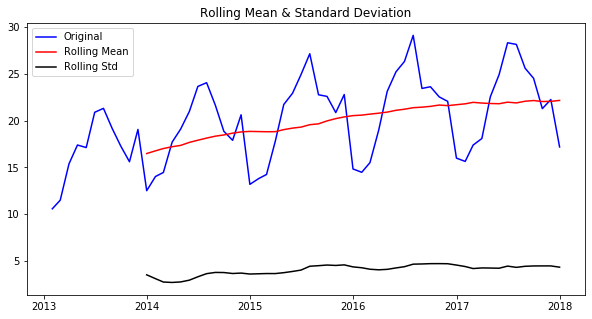

Results of Dickey Fuller Test:
Test Statistic                 -4.770101
p-value                         0.000062
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [27]:
test_stationarity(ds11resampled_log)

Still Rolling mean is not parallel to X axis.

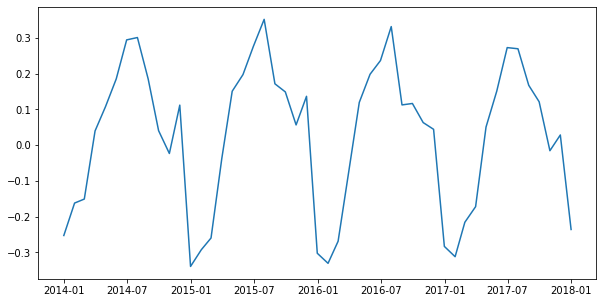

In [28]:
# Log Scale moving average method
mvngAvg  =  ds11resampled_log.rolling(window = 12).mean()
dataLogMinusMvngAvg  =  ds11resampled_log - mvngAvg
plt.plot(dataLogMinusMvngAvg)

#Remove NAN values
dataLogMinusMvngAvg.dropna(inplace = True)

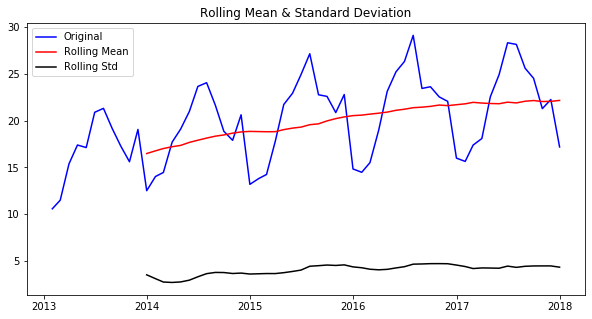

Results of Dickey Fuller Test:
Test Statistic                 -1.104570
p-value                         0.713246
#Lags Used                     11.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


In [29]:
test_stationarity(dataLogMinusMvngAvg)

The mean is still not parallel to X axis. ADF test statistics > critical value. Log scale moving average method is not working.

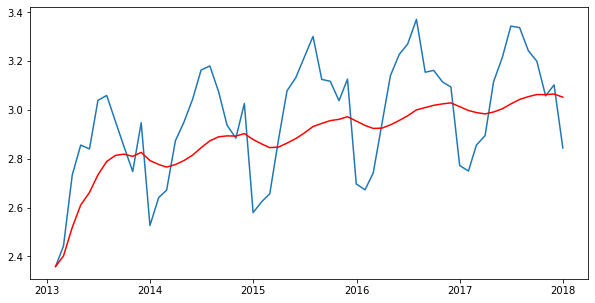

In [30]:
# Exponential decay transformation
exponentialDecayWeightedAverage  =  ds11resampled_log.ewm(halflife = 12, min_periods = 0, adjust = True).mean()
plt.plot(ds11resampled_log)
plt.plot(exponentialDecayWeightedAverage, color = 'red')

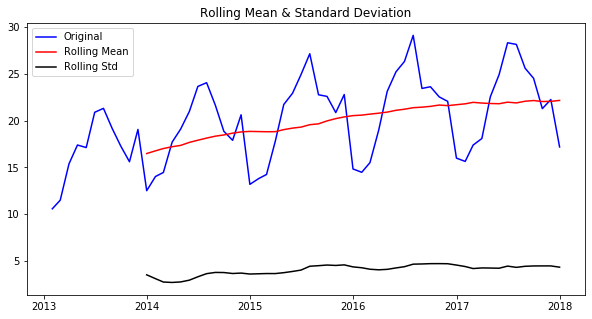

Results of Dickey Fuller Test:
Test Statistic                 -1.882944
p-value                         0.340127
#Lags Used                     10.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


In [31]:
test_stationarity(exponentialDecayWeightedAverage)

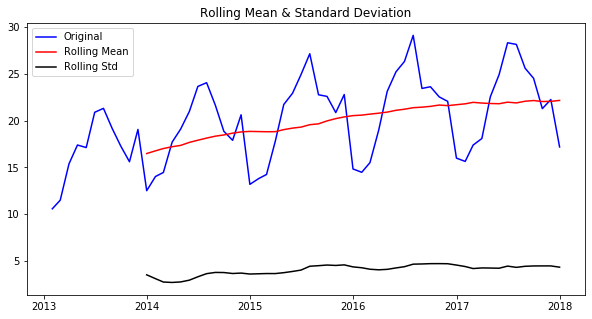

Results of Dickey Fuller Test:
Test Statistic                 -1.154964
p-value                         0.692663
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [32]:
datasetLogScaleMinusExponentialMovingAverage  =  ds11resampled_log - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)

Exponential decay is also not working as still there is trend and ADF test statistics > critical value.
We'd go ahead with ds11_resampled.

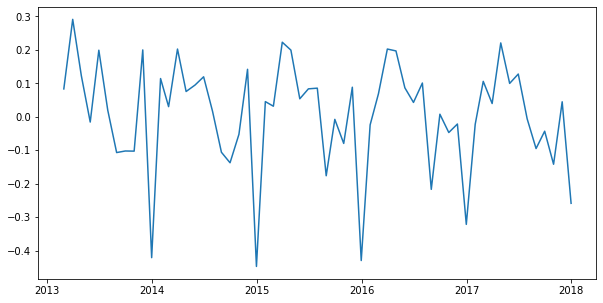

In [33]:
# Time shift Transformation

datasetLogDiffShifting  =  ds11resampled_log - ds11resampled_log.shift()
plt.plot(datasetLogDiffShifting)

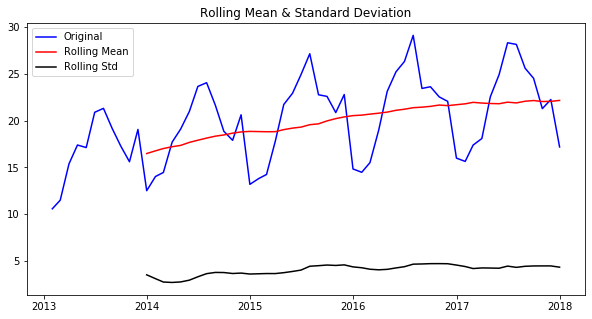

Results of Dickey Fuller Test:
Test Statistic                 -3.926183
p-value                         0.001850
#Lags Used                     11.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


In [34]:
datasetLogDiffShifting.dropna(inplace = True)

test_stationarity(datasetLogDiffShifting)

We'd still go ahead with ds11_resampled. Because test statistics value of ds11_resampled is better than time shift transformation 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


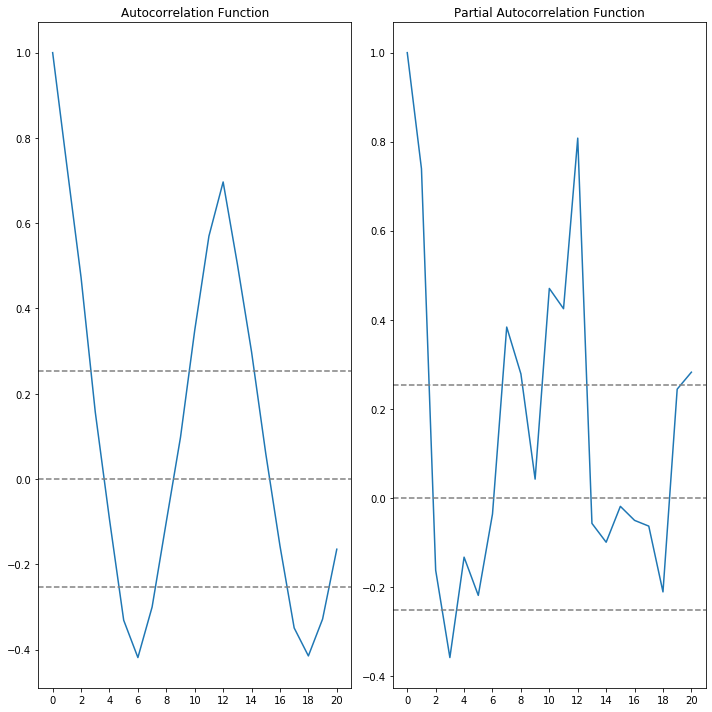

In [35]:
#ACF & PACF plots

from statsmodels.tsa.stattools import acf, pacf

lag_acf  =  acf(ds11_resampled, nlags = 20)
lag_pacf  =  pacf(ds11_resampled, nlags = 20, method = 'ols')
plt.rcParams['figure.figsize'] = (10, 10)

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(ds11_resampled)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(ds11_resampled)), linestyle = '--', color = 'gray')
plt.xticks(np.arange(0,22,2))
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(ds11_resampled)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(ds11_resampled)), linestyle = '--', color = 'gray')
plt.xticks(np.arange(0,22,2))
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()            

From ACF we get q=4 and from PACF we get p = 2

Building Model

In [36]:
ds11_resampled.head()

,sales
date,
2013-01-31,10.580645
2013-02-28,11.500000
2013-03-31,15.387097
2013-04-30,17.400000
2013-05-31,17.129032


Using AR model to forecast the number of sales for 3 months for item 1 store 1. Dividing dataset into train and test and keeping last 3 months data for testing and performance.

In [37]:
train, test = ds11_resampled[1:len(ds11_resampled)-3], ds11_resampled[len(ds11_resampled)-3:]
train.head()

,sales
date,
2013-02-28,11.500000
2013-03-31,15.387097
2013-04-30,17.400000
2013-05-31,17.129032
2013-06-30,20.900000


In [38]:
test.head()

,sales
date,
2017-10-31,21.290323
2017-11-30,22.266667
2017-12-31,17.193548


In [39]:
from statsmodels.tsa.ar_model import AR
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 10
Coefficients: const        5.330035
L1.sales     0.591359
L2.sales     0.133061
L3.sales    -0.207773
L4.sales     0.218610
L5.sales    -0.122363
L6.sales    -0.371595
L7.sales     0.152300
L8.sales     0.122895
L9.sales    -0.242174
L10.sales    0.479738
dtype: float64


In [40]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
predictions.head()
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test.iloc[i]))

predicted=20.932687, expected=21.290323
predicted=18.029426, expected=22.266667
predicted=15.837147, expected=17.193548


Model evaluation using mean_squared_error

In [41]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 6.641


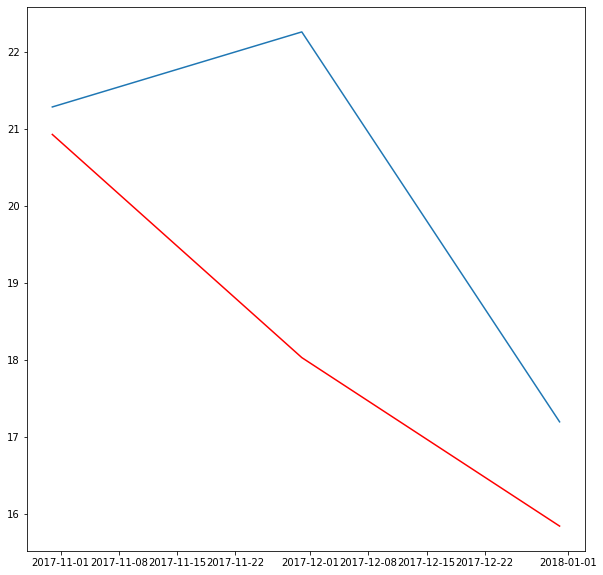

In [42]:
# plot results

pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

AR model is not that efficient to predict.

In [43]:
# ARMA model

In [44]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(train,order=(2,2))   
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 2
Coefficients: const          19.816309
ar.L1.sales     1.722544
ar.L2.sales    -0.980227
ma.L1.sales    -1.552804
ma.L2.sales     0.999043
dtype: float64


In [45]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test.iloc[i]))

predicted=20.811028, expected=21.290323
predicted=17.405385, expected=22.266667
predicted=14.688336, expected=17.193548


Test MSE: 10.046


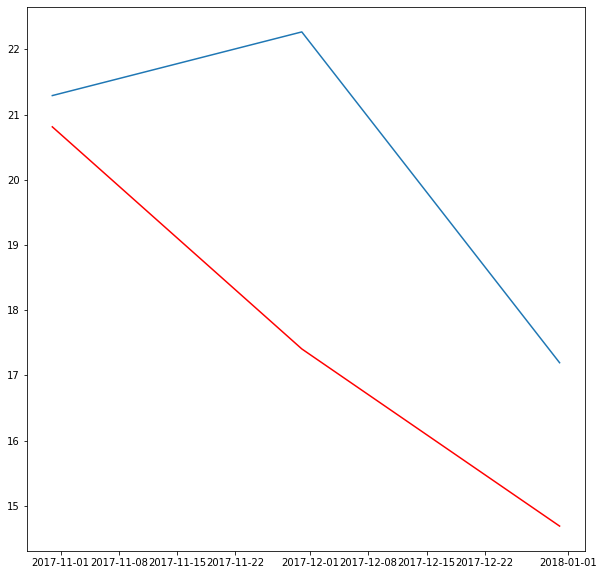

In [46]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results

pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

MSE is more than AR model

Plotting ARMA model


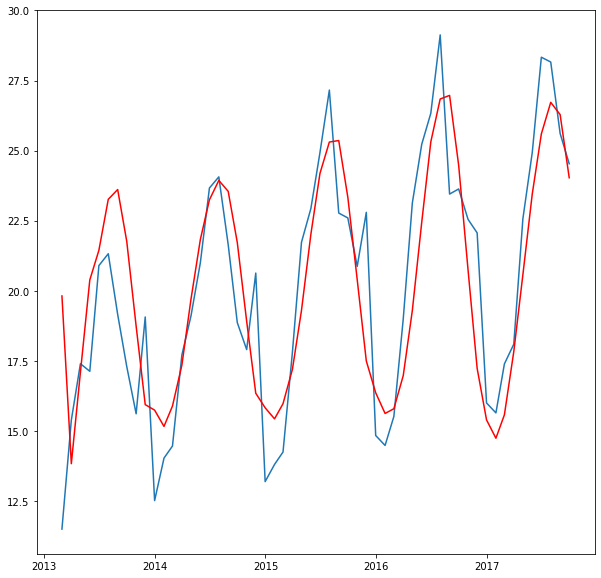

In [47]:
plt.plot(train)
plt.plot(model_fit.fittedvalues, color = 'red')
print('Plotting ARMA model')

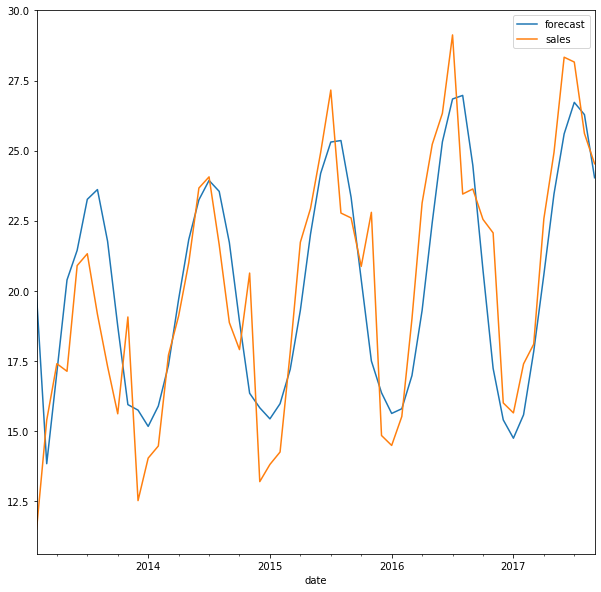

In [48]:
plot = model_fit.plot_predict()

In [49]:
#ARIMA model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ds11_resampled,order=(2,0,2))
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 2
Coefficients: const          19.816309
ar.L1.sales     1.722544
ar.L2.sales    -0.980227
ma.L1.sales    -1.552804
ma.L2.sales     0.999043
dtype: float64


In [50]:
results_ARIMA = model.fit()

In [51]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
error = mean_squared_error(ds11_resampled, results_ARIMA.fittedvalues)
print('Test MSE: %.3f' % error)

Test MSE: 6.574


In [52]:
results_ARIMA.fittedvalues.head()

date
2013-01-31    19.842826
2013-02-28    13.325461
2013-03-31    13.998087
2013-04-30    17.951719
2013-05-31    21.275389
Freq: M, dtype: float64

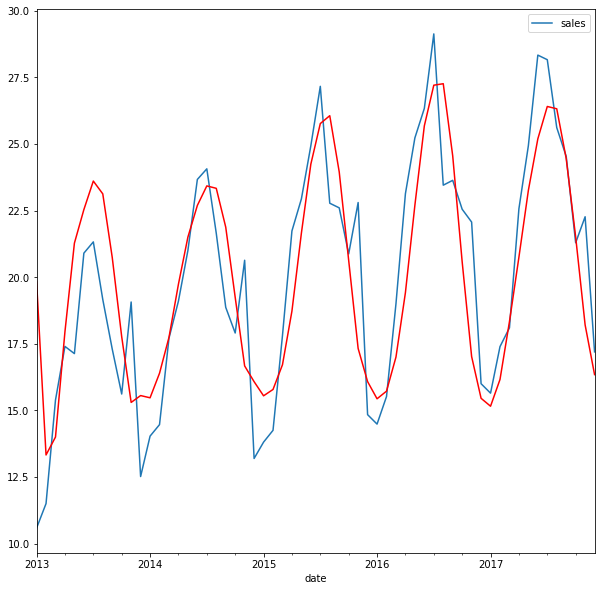

In [53]:
ds11_resampled.plot()
results_ARIMA.fittedvalues.plot(color='red')

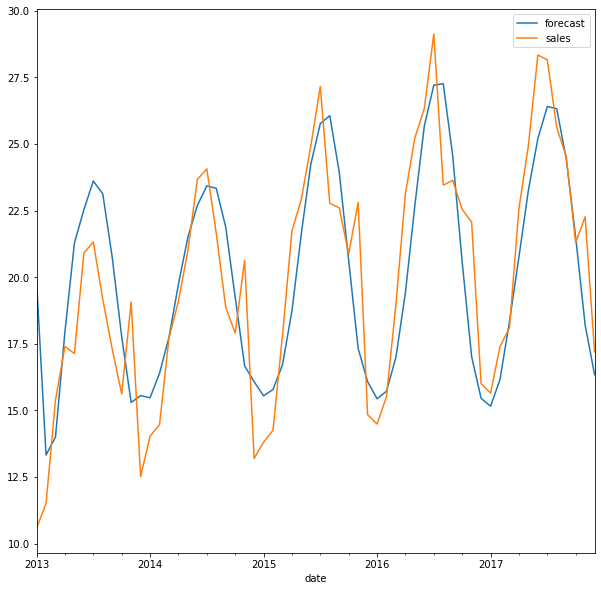

In [54]:
fitted_values = results_ARIMA.plot_predict()

In [55]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

date
2013-01-31    19.842826
2013-02-28    13.325461
2013-03-31    13.998087
2013-04-30    17.951719
2013-05-31    21.275389
Freq: M, dtype: float64

In [56]:
# Do I need to do these steps? Actually in class example, log of time series was taken so they are going for exp(predictions) 
# but in this case the TS is not log.
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

date
2013-01-31    19.842826
2013-02-28    33.168287
2013-03-31    47.166375
2013-04-30    65.118094
2013-05-31    86.393482
Freq: M, dtype: float64

In [57]:
predictions_ARIMA = pd.Series(ds11_resampled['sales'].iloc[0], index=ds11_resampled.index)
predictions_ARIMA = predictions_ARIMA.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA.head()

date
2013-01-31    30.423472
2013-02-28    43.748932
2013-03-31    57.747020
2013-04-30    75.698739
2013-05-31    96.974128
Freq: M, dtype: float64

In [58]:
reverted_back_prediction = pd.DataFrame(np.exp(predictions_ARIMA))
reverted_back_prediction.head()

,0
date,
2013-01-31,1.632096e+13
2013-02-28,9.998155e+18
2013-03-31,1.200085e+25
2013-04-30,7.508351e+32
2013-05-31,1.304153e+42


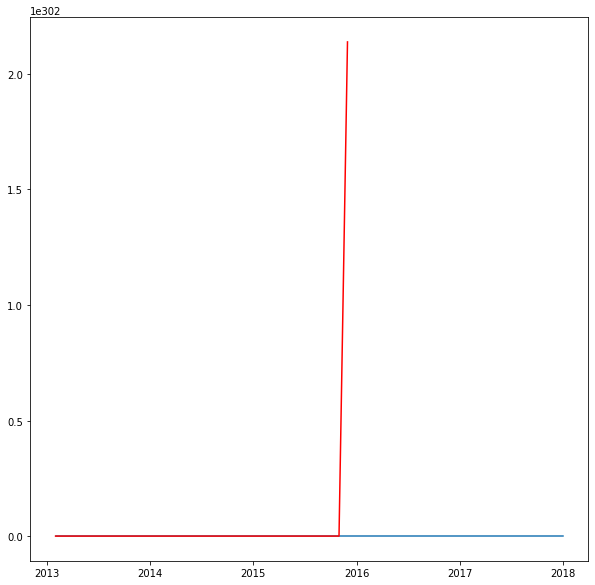

In [59]:
from matplotlib import pyplot
pyplot.plot(ds11_resampled)
pyplot.plot(reverted_back_prediction, color='red')
pyplot.show()

Above one doesn't look good at all.

# Seasonal Autoregressive Inegrated Moving Average 

Building ARIMA as per https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

In [60]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [61]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


Grid search method to find optimal parameters

In [62]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ds11_resampled,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:526.2351928268367
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:387.5719203827007
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:192.87416216023004
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1399.29771574179
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:168.776589412485
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:163.96888514718452
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:125.85326363134038
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1335.4179729200082
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:455.8698594091882
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:331.3391537765206
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:173.1606302985054
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1351.3603261993305
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:171.50877670761875
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:161.02021530306348
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:126.84718784488976
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1415.366313209779
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:295.0292969357005
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:206.47913942698486
ARI

ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:112.96770552172539  is chosen as it's the lowest AIC value.

In [63]:
mod = sm.tsa.statespace.SARIMAX(ds11_resampled,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0250      0.235     -0.106      0.915      -0.486       0.436
ma.L1         -0.8522      0.110     -7.779      0.000      -1.067      -0.637
ar.S.L12    2.158e-06      0.040   5.41e-05      1.000      -0.078       0.078
sigma2         1.2835      0.442      2.903      0.004       0.417       2.150


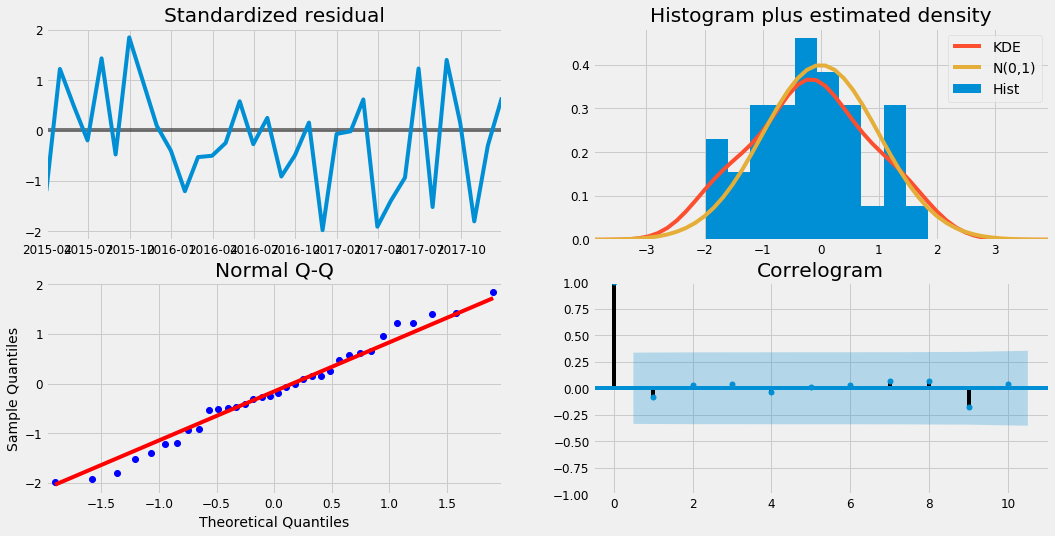

In [64]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

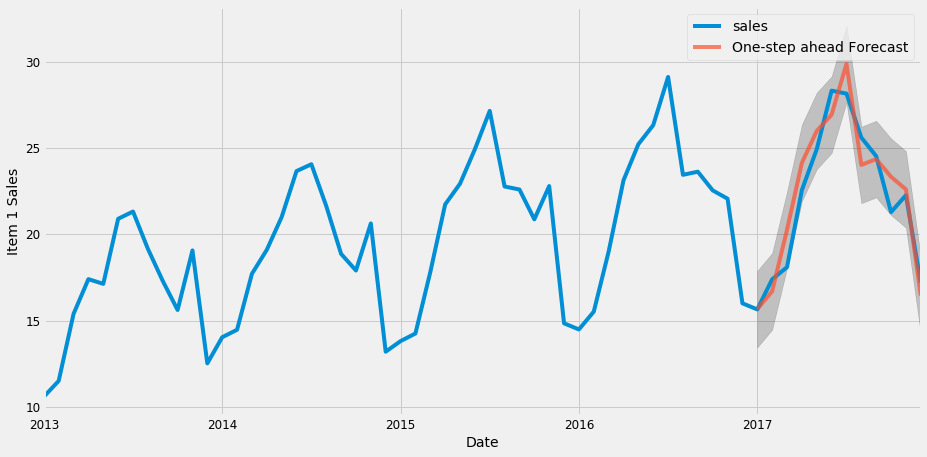

In [65]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = ds11_resampled['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Item 1 Sales')
plt.legend()
plt.show()

The line plot shows observed values compared to the rolling forest predictions. Overall forcasts align with the true values.

In [70]:
ds11_forecasted = pred.predicted_mean
ds11_truth = ds11_resampled['2017-01-31':]
ds11_forecasted.head(12)

date
2017-01-31    15.664241
2017-02-28    16.694792
2017-03-31    20.262873
2017-04-30    24.145522
2017-05-31    25.996169
2017-06-30    26.939976
2017-07-31    29.884348
2017-08-31    24.026466
2017-09-30    24.364414
2017-10-31    23.336002
2017-11-30    22.605863
2017-12-31    16.452571
Freq: M, dtype: float64

These values indicate the predicted values of the test we have run before.

In [71]:
mse = (ds11_forecasted.astype(float) - ds11_truth.astype(float).T).T
mse = mse.reset_index()
#mse['newCol'] = ds11_forcasted.astype(float).sales
mse['newCol'] = (mse.sales**2).mean()
mse

,date,sales,newCol
0,2017-01-31,0.019079,1.758506
1,2017-02-28,-0.698066,1.758506
2,2017-03-31,2.166099,1.758506
3,2017-04-30,1.578855,1.758506
4,2017-05-31,1.060686,1.758506
5,2017-06-30,-1.393357,1.758506
6,2017-07-31,1.723057,1.758506
7,2017-08-31,-1.586438,1.758506
8,2017-09-30,-0.168920,1.758506
9,2017-10-31,2.045679,1.758506


In [72]:
mse['rmse err'] = np.sqrt(mse.sales**2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse.sales**2), 2)))

The Root Mean Squared Error of our forecasts is 0     0.02
1     0.70
2     2.17
3     1.58
4     1.06
5     1.39
6     1.72
7     1.59
8     0.17
9     2.05
10    0.34
11    0.74
Name: sales, dtype: float64


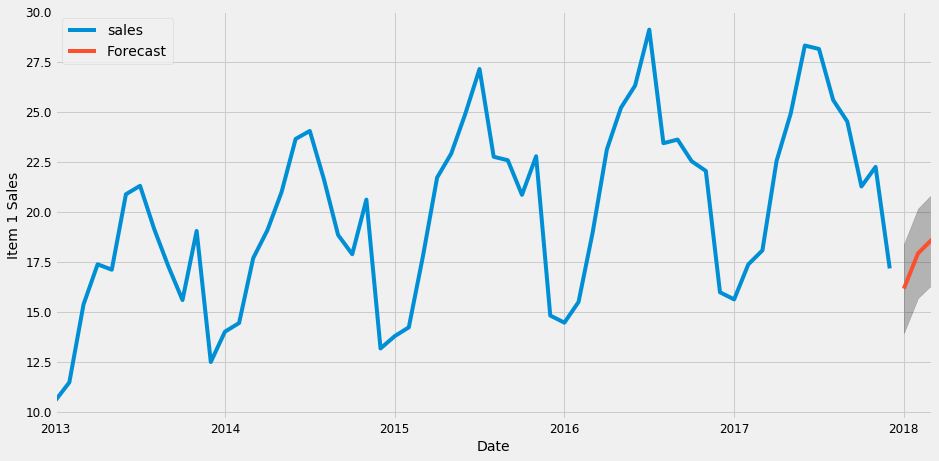

In [73]:
pred_uc = results.get_forecast(steps=3)
pred_ci = pred_uc.conf_int()
ax = ds11_resampled.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Item 1 Sales')
plt.legend()
plt.show()

In [74]:
forecast = pred_uc.predicted_mean
forecast.head(3)

2018-01-31    16.18241
2018-02-28    17.94653
2018-03-31    18.65003
Freq: M, dtype: float64

These are the prediction values for the future three months. Each value indicates average sale of item 1 in store 1 in that
particular month.

# END